In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
################################################################################
# Loading Data
################################################################################
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.set_index("id", inplace=True)
train.head(2)

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin


## Feature preparation

In [4]:
################################################################################
# Labels 
################################################################################a

le = preprocessing.LabelEncoder()

le.fit(train["type"])
print(list(le.classes_))

train["type_int"] = le.transform(train["type"]) 

['Ghost', 'Ghoul', 'Goblin']


In [5]:
# When generating one-hot encoding, drop one category:
train_color = pd.get_dummies(train["color"], drop_first = True)
train_dummies = train.join(train_color)
train_dummies.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type,type_int,blood,blue,clear,green,white
id,,,,,,,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,1,0.0,0.0,1.0,0.0,0.0
1,0.575560,0.425868,0.531401,0.439899,green,Goblin,2,0.0,0.0,0.0,1.0,0.0
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul,1,0.0,0.0,0.0,0.0,0.0
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul,1,0.0,0.0,0.0,0.0,0.0
5,0.566117,0.875862,0.418594,0.636438,green,Ghost,0,0.0,0.0,0.0,1.0,0.0


## Visualization

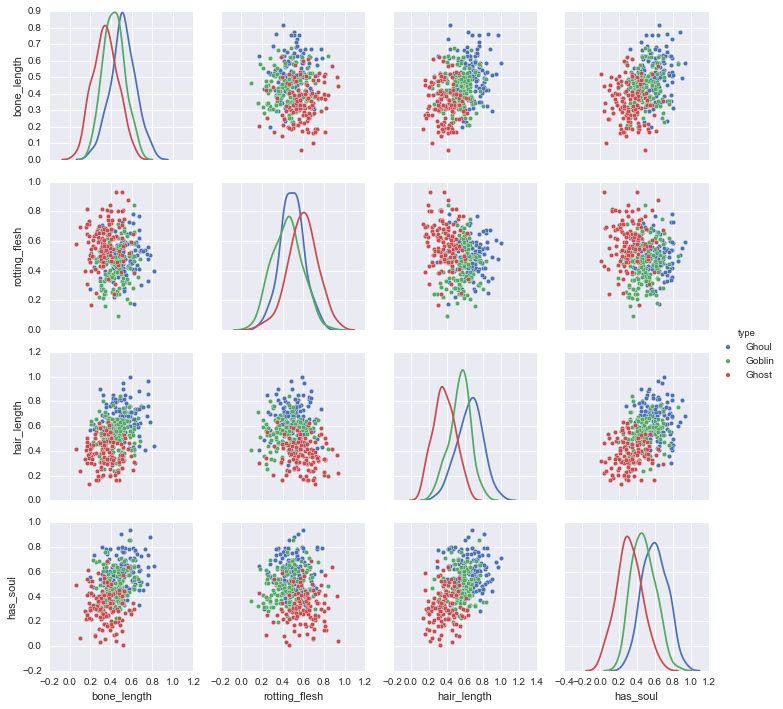

In [6]:
sns.set()
sns.pairplot(train[["bone_length", "rotting_flesh", "hair_length", "has_soul", "type"]], hue="type", diag_kind = "kde")

In [7]:
train["soul_hair"]=train["has_soul"]*train["hair_length"]
train["soul2_hair"]=train["has_soul"]*train["has_soul"]*train["hair_length"]
train ["hair_bone"]=train["hair_length"]*train["bone_length"]

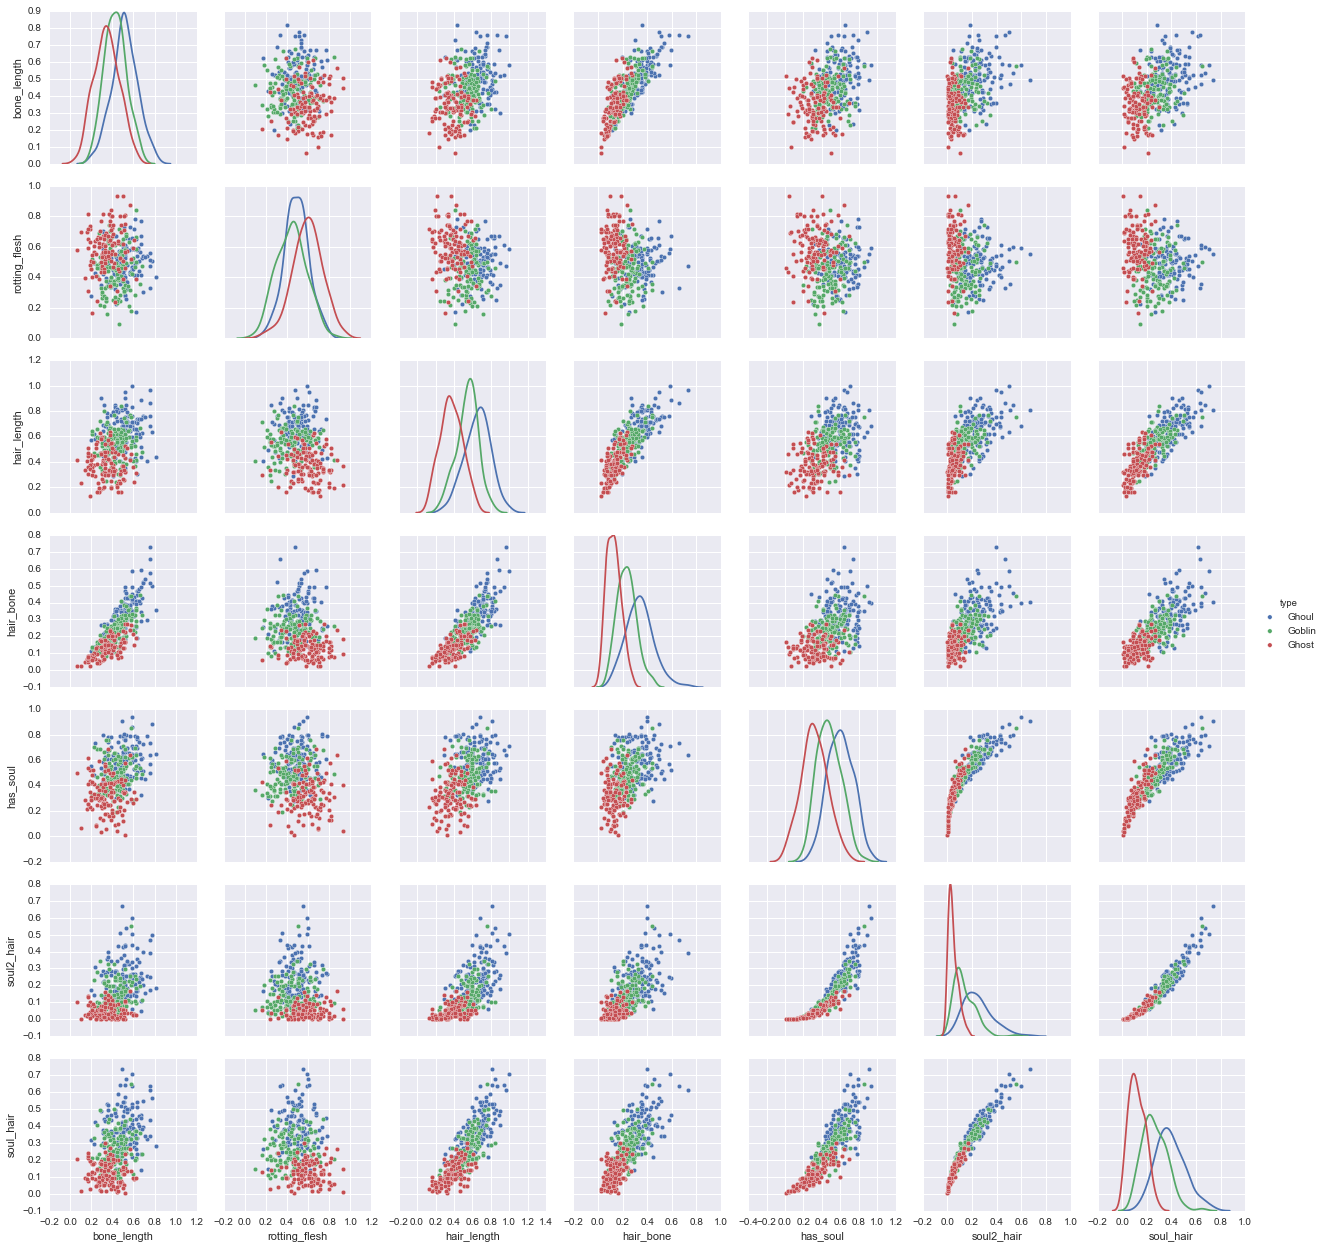

In [8]:
sns.set()
sns.pairplot(train[["bone_length", "rotting_flesh", "hair_length", "hair_bone", "has_soul", "soul2_hair", "soul_hair", "type"]], hue="type", diag_kind = "kde")